# Sentiment Analysis 

##  Library and data Setup 

In [4]:
# importing Necessary Library
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import time
import datetime as dt
import re
from bs4 import BeautifulSoup
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import tweepy
import csv
import random
from textblob import TextBlob
import datetime
import GetOldTweets3 as got
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV


# setting the visual
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Setting up consumer key and access token

In [6]:
consumer_key = 'fX6EirLtX46Xd0Hbk2PgIvrRT'
consumer_secret = 'MFV1w92xImT1eBFOXkscjsVIlBs5HAzk0dpgLHFLOu0msXKvNs'
access_token = '1266056127999082497-UbNqyij77sAw7TqzyfllifjnpAtaXP'
access_token_secret = 'bHOs8bzXIPSnAhQV9ysZ0w4kM2jZHCkPYli3I3g0BMwY5'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


In [9]:
#Load the data
df1= pd.read_csv('./df_tweets_20_01_01.csv')
df2= pd.read_csv('./df_tweets_19_01_01.csv')
df3= pd.read_csv('./df_tweets_18_01_01.csv')
df4= pd.read_csv('./df_tweets_17_12_31.csv')
df5= pd.read_csv('./df_tweets_16_12_31.csv')
df6= pd.read_csv('./df_tweets_15_12_30.csv')

In [10]:
# Concat CSVs:
df_total=[df1, df2, df3, df4, df5, df6]

In [11]:
# Concatenate all data into one DataFrame:

df = pd.concat(df_total, ignore_index=True)

In [12]:
df.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text  \
0  The DJFM TOP 108 of 2019 is now up on http://d...   
1  #fresh #juice #beets #carrots #ginger #apple #...   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...   
3  Oh yeah. Pictures of my dad’s Studios before &...   
4  I guess I don’t need the 4000 photos & screen ...   

                        Date  \
0  2020-01-01 23:58:56+00:00   
1  2020-01-01 23:57:38+00:00   
2  2020-01-01 23:57:35+00:00   
3  2020-01-01 23:56:48+00:00   
4  2020-01-01 23:54:24+00:00   

                                            Hashtags  
0  #apple #podcast #applepodcasts #google #google...  
1  #fresh #juice #beets #carrots #ginger #apple #...  
2                                     #iPhone #Apple  
3                                             #Apple  
4                                             #Apple

In [13]:
#df['Date']=pd.to_datetime(df['Date'],format = '%y-%m-%d %I.%M.%S.%f %p', errors='raise')


In [14]:
df.dtypes

Unnamed: 0     int64
Id             int64
Username      object
Text          object
Date          object
Hashtags      object
dtype: object

In [2]:
#pip install vaderSentiment

In [16]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
import xlsxwriter
import os

In [17]:
Tweet = df['Text']
Tweet.head()

0    The DJFM TOP 108 of 2019 is now up on http://d...
1    #fresh #juice #beets #carrots #ginger #apple #...
2    #iPhone 12 : #Apple pourrait revenir au lecteu...
3    Oh yeah. Pictures of my dad’s Studios before &...
4    I guess I don’t need the 4000 photos & screen ...
Name: Text, dtype: object

In [18]:
def sentimentScore(Tweet):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in Tweet:
        vs = analyzer.polarity_scores(sentence)
        print("Vader score: " + str(vs))
        #print("{: <65} {}".format(sentence, str(vs))) 
        #NOTE! I blocked the second print command so the sentences are
        #left out in the cell below, purely for clarity reasons
        results.append(vs)
    return results

In [19]:
pd.DataFrame.from_dict(sentimentScore(Tweet),orient='index')

Vader score: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.7739}
Vader score: {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.241, 'neu': 0.723, 'pos': 0.036, 'compound': -0.9098}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.084, 'neu': 0.73, 'pos': 0.185, 'compound': 0.4215}
Vader score: {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0762}
Vader score: {'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'compound': 0.2168}
Vader score: {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.2144}
Vader score: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.6666}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.765}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

AttributeError: 'list' object has no attribute 'values'

In [22]:
sentimentScore(Tweet)

Vader score: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.7739}
Vader score: {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.241, 'neu': 0.723, 'pos': 0.036, 'compound': -0.9098}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.084, 'neu': 0.73, 'pos': 0.185, 'compound': 0.4215}
Vader score: {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0762}
Vader score: {'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'compound': 0.2168}
Vader score: {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.2144}
Vader score: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.6666}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.765}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

[{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.7739},
 {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.241, 'neu': 0.723, 'pos': 0.036, 'compound': -0.9098},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.084, 'neu': 0.73, 'pos': 0.185, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0762},
 {'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'compound': 0.2168},
 {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.2144},
 {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.6666},
 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.765},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182},
 {'neg': 0.227, 'neu': 0.773

In [23]:
df_results = pd.DataFrame(sentimentScore(Tweet))

Vader score: {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.7739}
Vader score: {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.241, 'neu': 0.723, 'pos': 0.036, 'compound': -0.9098}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.084, 'neu': 0.73, 'pos': 0.185, 'compound': 0.4215}
Vader score: {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0762}
Vader score: {'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'compound': 0.2168}
Vader score: {'neg': 0.046, 'neu': 0.954, 'pos': 0.0, 'compound': -0.2144}
Vader score: {'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.6666}
Vader score: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.765}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

In [3]:
#df_results[['neg', 'neu', 'pos',]].plot(kind = 'pie', subplots=True);

In [ ]:
#df.plot.pie(subplots=True, figsize=(6, 3))

In [24]:
df_new = pd.merge(df, df_results, left_index=True, right_index=True)

In [25]:
df_new.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text  \
0  The DJFM TOP 108 of 2019 is now up on http://d...   
1  #fresh #juice #beets #carrots #ginger #apple #...   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...   
3  Oh yeah. Pictures of my dad’s Studios before &...   
4  I guess I don’t need the 4000 photos & screen ...   

                        Date  \
0  2020-01-01 23:58:56+00:00   
1  2020-01-01 23:57:38+00:00   
2  2020-01-01 23:57:35+00:00   
3  2020-01-01 23:56:48+00:00   
4  2020-01-01 23:54:24+00:00   

                                            Hashtags    neg    neu    pos  \
0  #apple #podcast #applepodcasts #google #google...  0.000  0.817  0.183   
1  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859  0.141   
2                                     #iPhone #Apple  0.000  1.000  0.000   
3                                             #Apple  0.241  0.723  0.036   
4                                             #Apple  0.000  1.000  0.000   

   compound  
0    0.7739  
1    0.3182  
2    0.0000  
3   -0.9098  
4    0.0000

In [26]:
df_new.shape

(19830, 10)

- Choose the common range for the dataframes to be used for all tweet data
The tweet data did not cover a uniform time period. For some a longer perido was covered, for some a shorter one. All could fit within the days, though.

- Adding a datetime column/index. Then, removing the 'Date' column and adding a datetime column/index. This format is needed for the daily average calculations!

In [27]:
df_new.columns

Index(['Unnamed: 0', 'Id', 'Username', 'Text', 'Date', 'Hashtags', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

In [28]:
df_new['Date'][0].split()[0]

'2020-01-01'

In [29]:
df_new['Date']=df_new['Date'].apply(lambda x: x.split()[0])

In [30]:
df_new.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
4  I guess I don’t need the 4000 photos & screen ...  2020-01-01   

                                            Hashtags    neg    neu    pos  \
0  #apple #podcast #applepodcasts #google #google...  0.000  0.817  0.183   
1  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859  0.141   
2                                     #iPhone #Apple  0.000  1.000  0.000   
3                                             #Apple  0.241  0.723  0.036   
4                                             #Apple  0.000  1.000  0.000   

   compound  
0    0.7739  
1    0.3182  
2    0.0000  
3   -0.9098  
4    0.0000

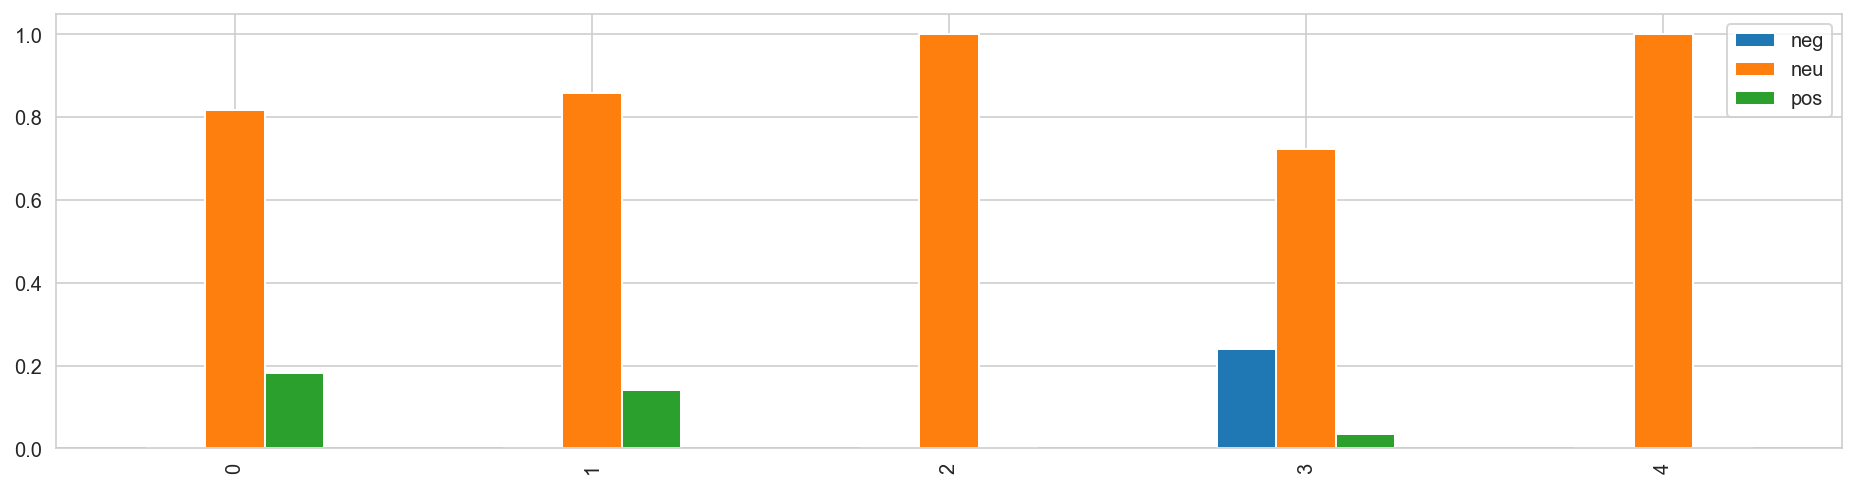

In [89]:
#plt.bar(df_new['Date'][:5], df_new[['neg', 'neu', 'pos']][:5] )
df_new[['neg', 'neu', 'pos']][:5].plot(kind = 'bar');

In [39]:
df_new.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
4  I guess I don’t need the 4000 photos & screen ...  2020-01-01   

                                            Hashtags    neg    neu    pos  \
0  #apple #podcast #applepodcasts #google #google...  0.000  0.817  0.183   
1  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859  0.141   
2                                     #iPhone #Apple  0.000  1.000  0.000   
3                                             #Apple  0.241  0.723  0.036   
4                                             #Apple  0.000  1.000  0.000   

   compound  
0    0.7739  
1    0.3182  
2    0.0000  
3   -0.9098  
4    0.0000

In [40]:
df_new['datetime'] = pd.to_datetime(df_new['Date']) # change of Date column to datetime columns
df_new_DW = df_new.set_index('datetime') # creates a new dataframe 'df_DA' with the new index column datetime 
df_new_DW.drop(['Date'], axis=1, inplace=True) #drops the original 'Date' column from the dataframe
df_new_DW.head()

Unnamed: 0                   Id         Username  \
datetime                                                       
2020-01-01           0  1212523635396763648    paulburyradio   
2020-01-01           1  1212523304923254784  FrankiesGourmet   
2020-01-01           2  1212523291807748097   MauriceViolton   
2020-01-01           3  1212523098664079361      StrayTurtle   
2020-01-01           4  1212522494642409472      StrayTurtle   

                                                         Text  \
datetime                                                        
2020-01-01  The DJFM TOP 108 of 2019 is now up on http://d...   
2020-01-01  #fresh #juice #beets #carrots #ginger #apple #...   
2020-01-01  #iPhone 12 : #Apple pourrait revenir au lecteu...   
2020-01-01  Oh yeah. Pictures of my dad’s Studios before &...   
2020-01-01  I guess I don’t need the 4000 photos & screen ...   

                                                     Hashtags    neg    neu  \
datetime                                                                      
2020-01-01  #apple #podcast #applepodcasts #google #google...  0.000  0.817   
2020-01-01  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859   
2020-01-01                                     #iPhone #Apple  0.000  1.000   
2020-01-01                                             #Apple  0.241  0.723   
2020-01-01                                             #Apple  0.000  1.000   

              pos  compound  
datetime                     
2020-01-01  0.183    0.7739  
2020-01-01  0.141    0.3182  
2020-01-01  0.000    0.0000  
2020-01-01  0.036   -0.9098  
2020-01-01  0.000    0.0000

In [41]:
df_new.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
4  I guess I don’t need the 4000 photos & screen ...  2020-01-01   

                                            Hashtags    neg    neu    pos  \
0  #apple #podcast #applepodcasts #google #google...  0.000  0.817  0.183   
1  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859  0.141   
2                                     #iPhone #Apple  0.000  1.000  0.000   
3                                             #Apple  0.241  0.723  0.036   
4                                             #Apple  0.000  1.000  0.000   

   compound   datetime  
0    0.7739 2020-01-01  
1    0.3182 2020-01-01  
2    0.0000 2020-01-01  
3   -0.9098 2020-01-01  
4    0.0000 2020-01-01

In [42]:
#df_new['Date'][0]

In [43]:
#df_new['Date'][0].split()

In [44]:
#df_new['Date'][0].split()[0]

In [45]:
#df_new['Date'].apply(lambda x: x.split()[0])

In [46]:
df_new.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
4  I guess I don’t need the 4000 photos & screen ...  2020-01-01   

                                            Hashtags    neg    neu    pos  \
0  #apple #podcast #applepodcasts #google #google...  0.000  0.817  0.183   
1  #fresh #juice #beets #carrots #ginger #apple #...  0.000  0.859  0.141   
2                                     #iPhone #Apple  0.000  1.000  0.000   
3                                             #Apple  0.241  0.723  0.036   
4                                             #Apple  0.000  1.000  0.000   

   compound   datetime  
0    0.7739 2020-01-01  
1    0.3182 2020-01-01  
2    0.0000 2020-01-01  
3   -0.9098 2020-01-01  
4    0.0000 2020-01-01

In [47]:
df_new.shape

(19830, 11)

- Slimming down the stream into a dataframe with only relevant columns.

In [48]:
df_new_DW = df_new[['Unnamed: 0', 'Id', 'Username', 'Text', 'Date', 'Hashtags', 'datetime',
       'neg', 'neu', 'pos', 'compound']]

df_new_DW.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
2  #iPhone 12 : #Apple pourrait revenir au lecteu...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
4  I guess I don’t need the 4000 photos & screen ...  2020-01-01   

                                            Hashtags   datetime    neg    neu  \
0  #apple #podcast #applepodcasts #google #google... 2020-01-01  0.000  0.817   
1  #fresh #juice #beets #carrots #ginger #apple #... 2020-01-01  0.000  0.859   
2                                     #iPhone #Apple 2020-01-01  0.000  1.000   
3                                             #Apple 2020-01-01  0.241  0.723   
4                                             #Apple 2020-01-01  0.000  1.000   

     pos  compound  
0  0.183    0.7739  
1  0.141    0.3182  
2  0.000    0.0000  
3  0.036   -0.9098  
4  0.000    0.0000

In [49]:
df_new_DW.dtypes

Unnamed: 0             int64
Id                     int64
Username              object
Text                  object
Date                  object
Hashtags              object
datetime      datetime64[ns]
neg                  float64
neu                  float64
pos                  float64
compound             float64
dtype: object

- Remove tweets were compound is zero, i.e. sentiment is neutral.
Neutral tweets do not reflect a positive or negative mood and serve therefore no purpose to this analysis.

In [50]:
df_new_DW = df_new_DW[(df_new_DW[['compound']] != 0).all(axis=1)]

In [51]:
df_new_DW.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
3           3  1212523098664079361      StrayTurtle   
6           6  1212521898464202753       MACINASNAP   
7           7  1212521819808256000        techeblog   

                                                Text        Date  \
0  The DJFM TOP 108 of 2019 is now up on http://d...  2020-01-01   
1  #fresh #juice #beets #carrots #ginger #apple #...  2020-01-01   
3  Oh yeah. Pictures of my dad’s Studios before &...  2020-01-01   
6  iPhone capacitor supplier looks forward to str...  2020-01-01   
7  Don't pay $250, get Powerbeats Pro Totally Wir...  2020-01-01   

                                            Hashtags   datetime    neg    neu  \
0  #apple #podcast #applepodcasts #google #google... 2020-01-01  0.000  0.817   
1  #fresh #juice #beets #carrots #ginger #apple #... 2020-01-01  0.000  0.859   
3                                             #Apple 2020-01-01  0.241  0.723   
6                                 #apple #macinasnap 2020-01-01  0.084  0.730   
7  #deals #gadgets #apple #airpods #technology #d... 2020-01-01  0.000  0.936   

     pos  compound  
0  0.183    0.7739  
1  0.141    0.3182  
3  0.036   -0.9098  
6  0.185    0.4215  
7  0.064    0.0762

In [52]:
df_new_DW.shape

(8817, 11)

- Create new column with the 'compound' multiplied by Unnamed: 0 of the account
The logic being, if the tweeter has many Unnamed: 0, the compound of the his/her tweet has more significance compared to a tweet by a "less significant" tweeter, with Unnamed: 0 (may be followers).

In [53]:
df_new_DW['Compound_multiplied'] = df_new_DW['compound']*df_new_DW['Unnamed: 0']

In [54]:
df_new_DW.shape

(8817, 12)

- Remove rows where 'Unnamed: 0' is NaN

In [55]:
nan_rows = df_new_DW[df_new_DW['Unnamed: 0'].isnull()]
nan_rows

Empty DataFrame
Columns: [Unnamed: 0, Id, Username, Text, Date, Hashtags, datetime, neg, neu, pos, compound, Compound_multiplied]
Index: []

In [56]:
df_new_DW.shape

(8817, 12)

In [57]:
df_tweet_SA = df_new_DW[np.isfinite(df_new_DW['Unnamed: 0'])]

In [58]:
df_d_mean=(df_new_DW.groupby(df_new_DW.datetime).mean())

df_d_mean.tail()

Unnamed: 0            Id       neg       neu       pos  compound  \
datetime                                                                       
2020-06-02      1532.0  1.267969e+18  0.081000  0.785667  0.133333  0.170600   
2020-06-03      1545.0  1.268330e+18  0.101625  0.735125  0.163250  0.236438   
2020-06-04      1555.0  1.268693e+18  0.041000  0.849200  0.109800  0.125300   
2020-06-05      1565.0  1.269054e+18  0.029750  0.823875  0.146375  0.375363   
2020-06-06      1576.0  1.269417e+18  0.132667  0.729333  0.138000 -0.022600   

            Compound_multiplied  
datetime                         
2020-06-02           262.371133  
2020-06-03           366.012963  
2020-06-04           196.250960  
2020-06-05           586.541062  
2020-06-06           -33.584667

- For my model the input data will be the daily average of compound multiplied with Unnamed: 0​.

In [59]:
#from sklearn.preprocessing import StandardScaler
cp = df_new_DW[['Compound_multiplied']].values.astype(float)

scaler = StandardScaler().fit(cp)

scaled_data = scaler.transform(cp)

df_new_DW['Compound_multiplied_scaled'] = scaled_data

df_new_DW.tail()
len(df_new_DW)

8817

In [60]:
# Create a dataframe with daily MEANS of each column
df_d_mean=(df_new_DW.groupby(df_new_DW.datetime).mean())

df_d_mean.tail()

Unnamed: 0            Id       neg       neu       pos  compound  \
datetime                                                                       
2020-06-02      1532.0  1.267969e+18  0.081000  0.785667  0.133333  0.170600   
2020-06-03      1545.0  1.268330e+18  0.101625  0.735125  0.163250  0.236438   
2020-06-04      1555.0  1.268693e+18  0.041000  0.849200  0.109800  0.125300   
2020-06-05      1565.0  1.269054e+18  0.029750  0.823875  0.146375  0.375363   
2020-06-06      1576.0  1.269417e+18  0.132667  0.729333  0.138000 -0.022600   

            Compound_multiplied  Compound_multiplied_scaled  
datetime                                                     
2020-06-02           262.371133                   -0.169194  
2020-06-03           366.012963                   -0.063803  
2020-06-04           196.250960                   -0.236430  
2020-06-05           586.541062                    0.160446  
2020-06-06           -33.584667                   -0.470144

In [61]:
#df_d_mean_no_tz = df_d_mean.copy()
#df_d_mean_no_tz.index.tz_convert(None)

In [62]:
df_d_mean.tail()

Unnamed: 0            Id       neg       neu       pos  compound  \
datetime                                                                       
2020-06-02      1532.0  1.267969e+18  0.081000  0.785667  0.133333  0.170600   
2020-06-03      1545.0  1.268330e+18  0.101625  0.735125  0.163250  0.236438   
2020-06-04      1555.0  1.268693e+18  0.041000  0.849200  0.109800  0.125300   
2020-06-05      1565.0  1.269054e+18  0.029750  0.823875  0.146375  0.375363   
2020-06-06      1576.0  1.269417e+18  0.132667  0.729333  0.138000 -0.022600   

            Compound_multiplied  Compound_multiplied_scaled  
datetime                                                     
2020-06-02           262.371133                   -0.169194  
2020-06-03           366.012963                   -0.063803  
2020-06-04           196.250960                   -0.236430  
2020-06-05           586.541062                    0.160446  
2020-06-06           -33.584667                   -0.470144

In [63]:
#df_d_mean.datetime.date()

In [64]:
#df_d_mean('datetime')[0] = pd.to_datetime(df_d_mean['datetime'])

### Load the data from yahoo finance

In [65]:
# Load the data
df_price = pd.read_csv('./AAPL1.csv')
df_price.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-01-02  111.389999  111.440002  107.349998  109.330002   99.945885   
1  2015-01-05  108.290001  108.650002  105.410004  106.250000   97.130241   
2  2015-01-06  106.540001  107.430000  104.629997  106.260002   97.139420   
3  2015-01-07  107.199997  108.199997  106.699997  107.750000   98.501518   
4  2015-01-08  109.230003  112.150002  108.699997  111.889999  102.286186   

     Volume  
0  53204600  
1  64285500  
2  65797100  
3  40105900  
4  59364500

In [66]:
con=df_price['Date']
df_price['Date']=pd.to_datetime(df_price['Date'])
df_price.set_index('Date', inplace=True)
#check datatype of index
df_price.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-05-22', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05'],
              dtype='datetime64[ns]', name='Date', length=1366, freq=None)

In [67]:
df_price.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  111.389999  111.440002  107.349998  109.330002   99.945885   
2015-01-05  108.290001  108.650002  105.410004  106.250000   97.130241   
2015-01-06  106.540001  107.430000  104.629997  106.260002   97.139420   
2015-01-07  107.199997  108.199997  106.699997  107.750000   98.501518   
2015-01-08  109.230003  112.150002  108.699997  111.889999  102.286186   

              Volume  
Date                  
2015-01-02  53204600  
2015-01-05  64285500  
2015-01-06  65797100  
2015-01-07  40105900  
2015-01-08  59364500

In [68]:
df_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [69]:
# Rename columns to avoid mixup with possible other data
df_price.columns = ['High', 'Low', 'Open', 'Close', 'Volume_stock', 'Adj_Close_stock']

In [70]:
# New column for crude measure of volatility - stock (not used in the model)
#The % spread based on the closing price.
df_price['apple_price'] = (df_price['High'] - df_price['Low']) / df_price['Adj_Close_stock'] * 100.0

In [71]:
#New column for daily percent change - price
df_price['Pct_change_price'] = (df_price['Close'] - df_price['Open']) / df_price['Open'] * 100.0

In [72]:
#New column for daily percent change scaled - price
price_a = df_price[['Pct_change_price']].values.astype(float)

scaler = StandardScaler().fit(price_a)

scaled_data = scaler.transform(price_a)

df_price['Pct_change_price_scaled'] = scaled_data

df_price.tail()

High         Low        Open       Close  Volume_stock  \
Date                                                                       
2020-06-01  317.750000  322.350006  317.209991  321.850006    321.850006   
2020-06-02  320.750000  323.440002  318.929993  323.339996    323.339996   
2020-06-03  324.660004  326.200012  322.299988  325.119995    325.119995   
2020-06-04  324.390015  325.619995  320.779999  322.320007    322.320007   
2020-06-05  323.350006  331.750000  323.230011  331.500000    331.500000   

            Adj_Close_stock  apple_price  Pct_change_price  \
Date                                                         
2020-06-01         20197800    -0.000023          1.462758   
2020-06-02         21910700    -0.000012          1.382750   
2020-06-03         26122800    -0.000006          0.874963   
2020-06-04         21890100    -0.000006          0.480082   
2020-06-05         34289200    -0.000024          2.558546   

            Pct_change_price_scaled  
Date                                 
2020-06-01                 0.498032  
2020-06-02                 0.415549  
2020-06-03                -0.107945  
2020-06-04                -0.515042  
2020-06-05                 1.627718

In [73]:
df_price.head()

High         Low        Open       Close  Volume_stock  \
Date                                                                       
2015-01-02  111.389999  111.440002  107.349998  109.330002     99.945885   
2015-01-05  108.290001  108.650002  105.410004  106.250000     97.130241   
2015-01-06  106.540001  107.430000  104.629997  106.260002     97.139420   
2015-01-07  107.199997  108.199997  106.699997  107.750000     98.501518   
2015-01-08  109.230003  112.150002  108.699997  111.889999    102.286186   

            Adj_Close_stock   apple_price  Pct_change_price  \
Date                                                          
2015-01-02         53204600 -9.398248e-08          1.844438   
2015-01-05         64285500 -5.600034e-07          0.796885   
2015-01-06         65797100 -1.352642e-06          1.557875   
2015-01-07         40105900 -2.493399e-06          0.984070   
2015-01-08         59364500 -4.918763e-06          2.934685   

            Pct_change_price_scaled  
Date                                 
2015-01-02                 0.891519  
2015-01-05                -0.188440  
2015-01-06                 0.596092  
2015-01-07                 0.004537  
2015-01-08                 2.015492

In [74]:
df_price.dtypes

High                       float64
Low                        float64
Open                       float64
Close                      float64
Volume_stock               float64
Adj_Close_stock              int64
apple_price                float64
Pct_change_price           float64
Pct_change_price_scaled    float64
dtype: object

In [75]:
 # Combine the tweet sentiment dataframe with the stock data dataframe
df_total = pd.concat([df_price[['Volume_stock','Adj_Close_stock','apple_price','Pct_change_price', 'Pct_change_price_scaled']],\
                     df_d_mean], axis=1, sort=False)



# Combine the tweet sentiment dataframe with the stock data dataframe
df_total = pd.concat([df_price[['Volume_stock','Adj_Close_stock','apple_price','Pct_change_price', 'Pct_change_price_scaled']],\
                     df_d_mean], axis=1, sort=False)

#### Impute missing data with their means

- For some of the cashtag twitter data entire days were missing. Mean imputation replaces missing values with the mean value of that feature/variable. Mean imputation is one of the most ‘naive’ imputation methods because unlike more complex methods like k-nearest neighbors imputation, it does not use the information we have about an observation to estimate a value for it.

It's not pretty, it's not fully accurate, but better than removing these days altogether. Besides, there might be other missing days for the other cashtag tweets and this cell fixes them all.

In [76]:
df_total['compound'].fillna(df_total['compound'].mean(), inplace=True)
df_total['neg'].fillna(df_total['neg'].mean(), inplace=True)
df_total['neu'].fillna(df_total['neu'].mean(), inplace=True)
df_total['pos'].fillna(df_total['pos'].mean(), inplace=True)
df_total['Compound_multiplied'].fillna(df_total['Compound_multiplied'].mean(), inplace=True)
df_total['Compound_multiplied_scaled'].fillna(df_total['Compound_multiplied_scaled'].mean(), inplace=True)

df_total.tail()

Volume_stock  Adj_Close_stock  apple_price  Pct_change_price  \
2020-06-02    323.339996       21910700.0    -0.000012          1.382750   
2020-06-03    325.119995       26122800.0    -0.000006          0.874963   
2020-06-04    322.320007       21890100.0    -0.000006          0.480082   
2020-06-05    331.500000       34289200.0    -0.000024          2.558546   
2020-06-06           NaN              NaN          NaN               NaN   

            Pct_change_price_scaled  Unnamed: 0            Id       neg  \
2020-06-02                 0.415549      1532.0  1.267969e+18  0.081000   
2020-06-03                -0.107945      1545.0  1.268330e+18  0.101625   
2020-06-04                -0.515042      1555.0  1.268693e+18  0.041000   
2020-06-05                 1.627718      1565.0  1.269054e+18  0.029750   
2020-06-06                      NaN      1576.0  1.269417e+18  0.132667   

                 neu       pos  compound  Compound_multiplied  \
2020-06-02  0.785667  0.133333  0.170600           262.371133   
2020-06-03  0.735125  0.163250  0.236438           366.012963   
2020-06-04  0.849200  0.109800  0.125300           196.250960   
2020-06-05  0.823875  0.146375  0.375363           586.541062   
2020-06-06  0.729333  0.138000 -0.022600           -33.584667   

            Compound_multiplied_scaled  
2020-06-02                   -0.169194  
2020-06-03                   -0.063803  
2020-06-04                   -0.236430  
2020-06-05                    0.160446  
2020-06-06                   -0.470144

In [77]:
#Interpolate for missing weekend stock data!
df_total[[ "Volume_stock", "Adj_Close_stock", "apple_price", "Pct_change_price", "Pct_change_price_scaled"]] = \
df_total[[ "Volume_stock", "Adj_Close_stock", "apple_price", "Pct_change_price", "Pct_change_price_scaled"]] \
.interpolate(method='linear', limit_direction='forward', axis=0)


# Create 'label' -column for the forecast; 'Predicted_change' for the next day
With forecasting, you want to forecast out a certain number of datapoints. Let's we want to forecast out 1% of the entire length of the dataset. Thus, if our data is 1259 days of stock prices and you are just trying to predict tomorrow's price, then you would just do 1 day out, and the forecast would be just one day out. If you predict 10 days out, you can actually generate a forecast for every day, for the next week and a half.

I just add a new column - 'Predicted_change' - into the dataframe with a simple pandas operation:

Previous day's 'Compound_multiplied_scaled' should predict next day's 'Pct_change'.

In [78]:
#import math

forecast_col = 'Pct_change_price'

forecast_out = int(math.ceil(0.013 * len(df_total)))

df_total['Predicted_change_price'] = df_total[forecast_col].shift(-forecast_out)

In [79]:
df_total['Pct_change_price'].isnull().sum()

1

In [80]:
df_total= df_total.dropna(how='any')

In [81]:
df_total.shape

(1934, 14)

In [82]:
#df_total = df_totla.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

In [83]:
buy_or_sell = []

for row in df_total['Pct_change_price']:
    if row >= 0:
        buy_or_sell.append(1)
    elif row < 0:
        buy_or_sell.append(-1) 

#Adds -1 or +1 to the column based on if 'Predicted_change' is negative or positive
df_total['Buy/Sell'] = buy_or_sell

# The 'Buy/Sell' values need to be shifted up one row to match the 'Predicted_change' values
df_total['Buy/Sell'] = df_total['Buy/Sell'].shift(-1)

In [84]:
pd.DataFrame.describe(df_total)

Volume_stock  Adj_Close_stock  apple_price  Pct_change_price  \
count   1934.000000     1.934000e+03  1934.000000       1934.000000   
mean     158.488578     3.636478e+07    -0.000005          0.982396   
std       57.066109     1.756977e+07     0.000004          0.925335   
min       84.962914     1.136200e+07    -0.000027          0.000000   
25%      109.647702     2.417458e+07    -0.000007          0.407408   
50%      150.145279     3.205950e+07    -0.000003          0.765355   
75%      189.391720     4.397690e+07    -0.000002          1.252548   
max      326.316681     1.622063e+08     0.000000         12.086960   

       Pct_change_price_scaled   Unnamed: 0            Id          neg  \
count              1934.000000  1934.000000  1.934000e+03  1934.000000   
mean                  0.002811  1744.706389  9.076376e+17     0.061243   
std                   0.953960  1063.883145  2.043618e+17     0.055745   
min                  -1.009975     4.500000  5.511658e+17     0.000000   
25%                  -0.589965   814.464286  7.313633e+17     0.019000   
50%                  -0.220945  1684.791667  9.086611e+17     0.050900   
75%                   0.281319  2673.500000  1.084147e+18     0.090000   
max                  11.450887  3656.000000  1.259996e+18     0.358000   

               neu          pos     compound  Compound_multiplied  \
count  1934.000000  1934.000000  1934.000000          1934.000000   
mean      0.781144     0.157608     0.243019           416.652527   
std       0.060267     0.068303     0.263416           585.229794   
min       0.512333     0.000000    -0.822500         -2164.820000   
25%       0.746700     0.111500     0.089071            52.511608   
50%       0.787500     0.154367     0.268143           302.011283   
75%       0.820500     0.199475     0.428005           734.815710   
max       0.957000     0.468333     0.921100          2689.419900   

       Compound_multiplied_scaled  Predicted_change_price  Buy/Sell  
count                 1934.000000             1934.000000    1933.0  
mean                    -0.012309                0.980925       1.0  
std                      0.595105                0.921821       0.0  
min                     -2.637341                0.000000       1.0  
25%                     -0.382595                0.407776       1.0  
50%                     -0.128885                0.765042       1.0  
75%                      0.311222                1.251847       1.0  
max                      2.298808               12.086960       1.0

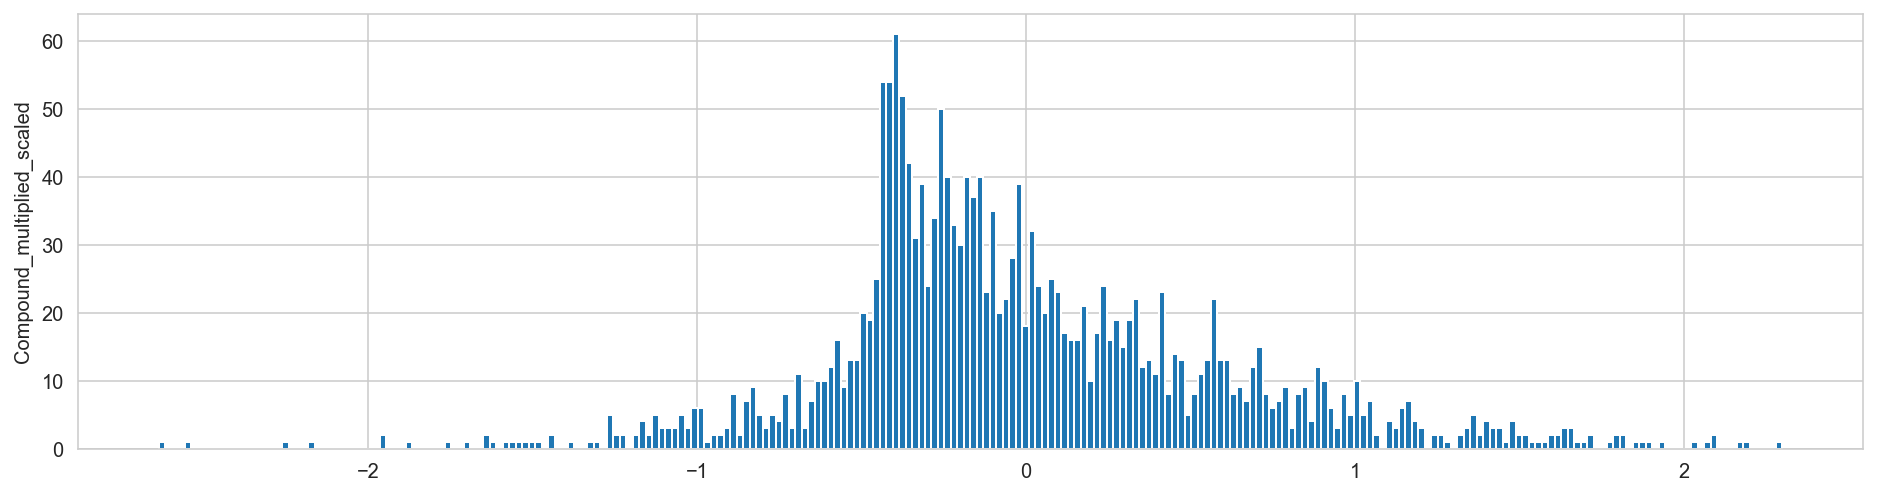

In [85]:
# check for spotting possible outliers
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x = df_total['Compound_multiplied_scaled']
plt.hist(x, bins=250)
plt.ylabel('Compound_multiplied_scaled');

In [86]:
# import csv
# import os

#df_3 = pd.read_csv('./df_total.csv')
df_total.to_csv('df_3.csv', index =False)
#writer_df.save()

#os.rename('df_total.csv') # UPDATE THE $CASHTAG BEFORE RUNNING THE CELL!

In [121]:
df.tail()

Unnamed: 0                  Id         Username  \
19825        3635  682350233515372544    Planet_Tablet   
19826        3636  682350181719879681            Rey__   
19827        3637  682349696619261953  Shatter_Records   
19828        3638  682349574602813442        FonzRuGby   
19829        3639  682349516700385281  andirabintang94   

                                                    Text  \
19825  Cómo aumentar la memoria del iPad: #iCloud y o...   
19826  Interesting!! How Apple, Google, and Microsoft...   
19827  Mixing, Mastering, Arranging, Stacking Hits #n...   
19828  #ShowYourTOMO @mrtomo15 #tomo2uesdays #Tech #S...   
19829  #KCA #VoteJKT48ID sh_fzs_49: #iphone #apple De...   

                            Date  \
19825  2015-12-30 23:59:07+00:00   
19826  2015-12-30 23:58:55+00:00   
19827  2015-12-30 23:56:59+00:00   
19828  2015-12-30 23:56:30+00:00   
19829  2015-12-30 23:56:16+00:00   

                                                Hashtags  
19825                          #iCloud #iPad #iOS #Apple  
19826                    #apps #apple #google #microsoft  
19827  #newmusic #hiphop #edm #dance #music #ableton ...  
19828  #ShowYourTOMO #tomo2uesdays #Tech #StartUP #So...  
19829                   #KCA #VoteJKT48ID #iphone #apple

In [122]:
df.shape

(19830, 6)

In [123]:
df.isnull().sum()

Unnamed: 0     0
Id             0
Username       0
Text           0
Date           0
Hashtags      13
dtype: int64

In [15]:
df.dropna(inplace =True)

In [16]:
df.shape

(19817, 6)

In [17]:
df.isnull().sum()

Unnamed: 0    0
Id            0
Username      0
Text          0
Date          0
Hashtags      0
dtype: int64

In [18]:
# there are some duplicate comments, mostly automated comments by moderators

df.duplicated().sum()

0

In [19]:
df.shape

(19817, 6)

In [20]:
np.unique(df.Date)

array(['2015-01-01 23:56:12+00:00', '2015-01-01 23:56:15+00:00',
       '2015-01-01 23:56:17+00:00', ..., '2020-06-06 23:58:00+00:00',
       '2020-06-06 23:58:03+00:00', '2020-06-06 23:58:46+00:00'],
      dtype=object)

### Clean the Text

In [21]:
# some of these are redundant with the default functions of CountVectorizer but that's OK

def cleaner(text):
    # Make lowercase
    text = text.lower()

    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

# Adapted from GA office lecture and some modification

In [22]:
df['Text'] = df['Text'].apply(cleaner)

In [23]:
df.shape

(19817, 6)

In [24]:
df.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text  \
0  the djfm top 108 2019 now http djfm also apple...   
1   fresh juice beets carrots ginger apple lemon ...   
2   iphone apple pourrait revenir lecteur emprein...   
3   yeah pictures dad’ studios before after arriv...   
4   guess don’ need the 4000 photos screen shots ...   

                        Date  \
0  2020-01-01 23:58:56+00:00   
1  2020-01-01 23:57:38+00:00   
2  2020-01-01 23:57:35+00:00   
3  2020-01-01 23:56:48+00:00   
4  2020-01-01 23:54:24+00:00   

                                            Hashtags  
0  #apple #podcast #applepodcasts #google #google...  
1  #fresh #juice #beets #carrots #ginger #apple #...  
2                                     #iPhone #Apple  
3                                             #Apple  
4                                             #Apple

In [25]:
df.dtypes

Unnamed: 0     int64
Id             int64
Username      object
Text          object
Date          object
Hashtags      object
dtype: object

In [26]:
df.Date = pd.to_datetime(df.Date)

In [27]:
pd.to_datetime(df['Date'])

0       2020-01-01 23:58:56+00:00
1       2020-01-01 23:57:38+00:00
2       2020-01-01 23:57:35+00:00
3       2020-01-01 23:56:48+00:00
4       2020-01-01 23:54:24+00:00
                   ...           
19825   2015-12-30 23:59:07+00:00
19826   2015-12-30 23:58:55+00:00
19827   2015-12-30 23:56:59+00:00
19828   2015-12-30 23:56:30+00:00
19829   2015-12-30 23:56:16+00:00
Name: Date, Length: 19817, dtype: datetime64[ns, UTC]

In [28]:
df.dtypes

Unnamed: 0                  int64
Id                          int64
Username                   object
Text                       object
Date          datetime64[ns, UTC]
Hashtags                   object
dtype: object

In [29]:
df.head()

Unnamed: 0                   Id         Username  \
0           0  1212523635396763648    paulburyradio   
1           1  1212523304923254784  FrankiesGourmet   
2           2  1212523291807748097   MauriceViolton   
3           3  1212523098664079361      StrayTurtle   
4           4  1212522494642409472      StrayTurtle   

                                                Text  \
0  the djfm top 108 2019 now http djfm also apple...   
1   fresh juice beets carrots ginger apple lemon ...   
2   iphone apple pourrait revenir lecteur emprein...   
3   yeah pictures dad’ studios before after arriv...   
4   guess don’ need the 4000 photos screen shots ...   

                       Date                                           Hashtags  
0 2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...  
1 2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...  
2 2020-01-01 23:57:35+00:00                                     #iPhone #Apple  
3 2020-01-01 23:56:48+00:00                                             #Apple  
4 2020-01-01 23:54:24+00:00                                             #Apple

In [30]:
hours = df['Date'].dt.hour

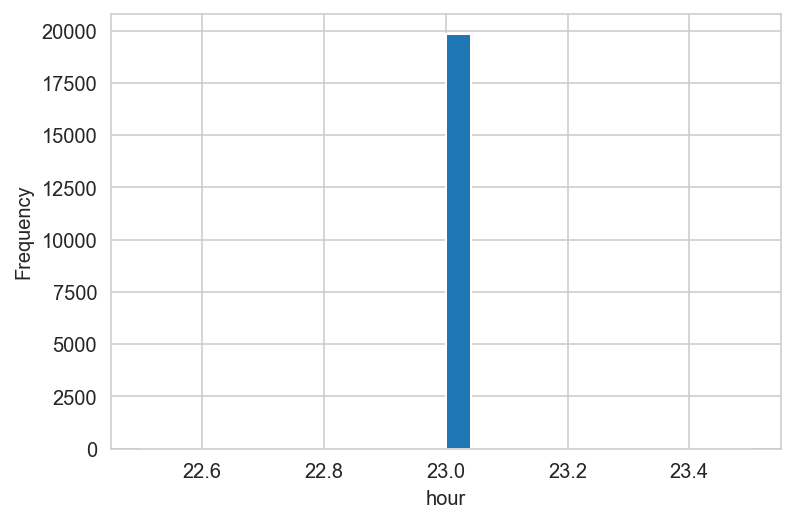

In [31]:
hours.plot(kind = 'hist', bins=24);
plt.ylabel('Frequency')
plt.xlabel('hour');

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


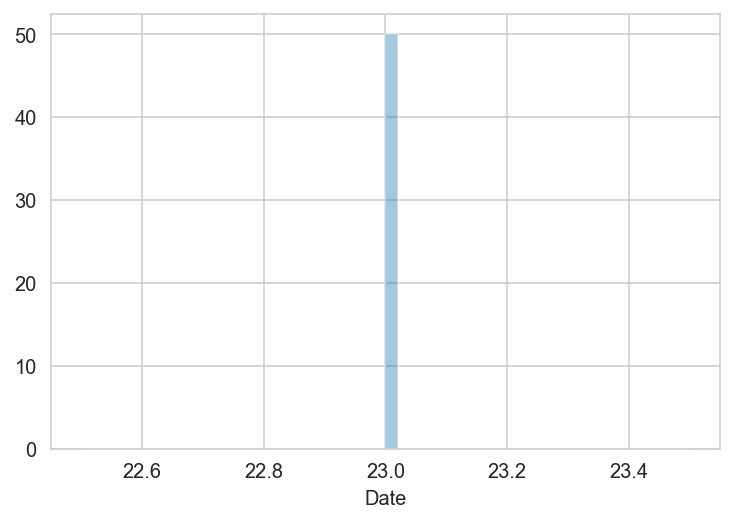

In [32]:
ax = sns.distplot(hours)

In [33]:
from datetime import datetime
con=df['Date']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2020-01-01 23:58:56+00:00', '2020-01-01 23:57:38+00:00',
               '2020-01-01 23:57:35+00:00', '2020-01-01 23:56:48+00:00',
               '2020-01-01 23:54:24+00:00', '2020-01-01 23:52:11+00:00',
               '2020-01-01 23:52:02+00:00', '2020-01-01 23:51:44+00:00',
               '2020-01-01 23:49:38+00:00', '2020-01-01 23:46:31+00:00',
               ...
               '2015-12-30 23:59:25+00:00', '2015-12-30 23:59:25+00:00',
               '2015-12-30 23:59:24+00:00', '2015-12-30 23:59:19+00:00',
               '2015-12-30 23:59:14+00:00', '2015-12-30 23:59:07+00:00',
               '2015-12-30 23:58:55+00:00', '2015-12-30 23:56:59+00:00',
               '2015-12-30 23:56:30+00:00', '2015-12-30 23:56:16+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=19817, freq=None)

In [34]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00   fresh juice beets carrots ginger apple lemon ...   
2020-01-01 23:57:35+00:00   iphone apple pourrait revenir lecteur emprein...   
2020-01-01 23:56:48+00:00   yeah pictures dad’ studios before after arriv...   
2020-01-01 23:54:24+00:00   guess don’ need the 4000 photos screen shots ...   

                                                                    Hashtags  
Date                                                                          
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...  
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...  
2020-01-01 23:57:35+00:00                                     #iPhone #Apple  
2020-01-01 23:56:48+00:00                                             #Apple  
2020-01-01 23:54:24+00:00                                             #Apple

In [35]:
df.dtypes

Unnamed: 0     int64
Id             int64
Username      object
Text          object
Hashtags      object
dtype: object

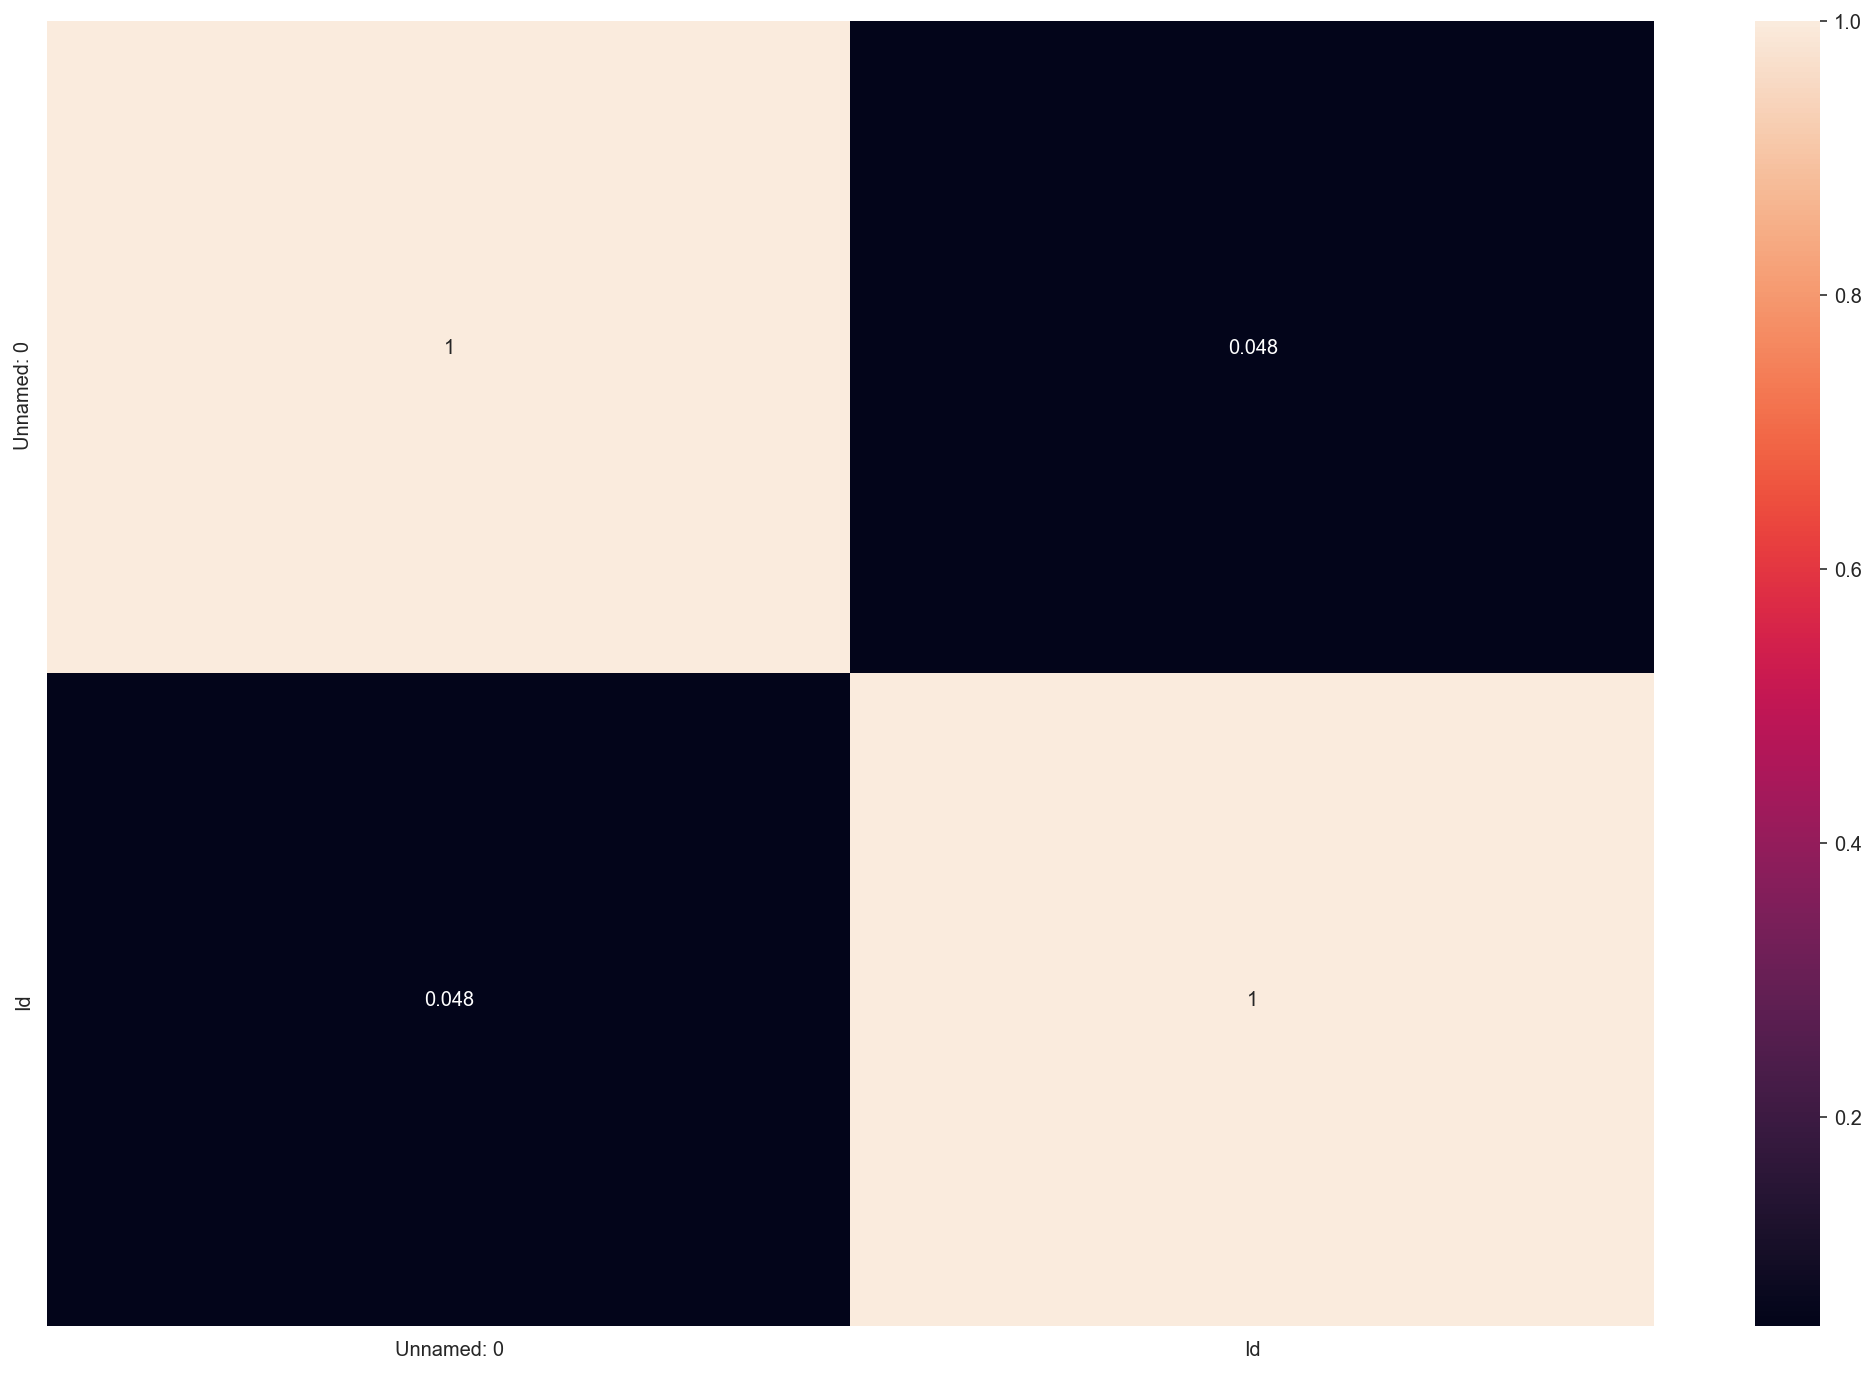

In [36]:
corr = df.corr()

plt.figure(figsize=(18,12))

sns.heatmap(corr,
            annot=True);

In [37]:
df.describe()

Unnamed: 0            Id
count  19817.000000  1.981700e+04
mean    1742.140940  9.101827e+17
std     1056.987878  2.076155e+17
min        0.000000  5.508027e+17
25%      826.000000  7.301856e+17
50%     1667.000000  9.102920e+17
75%     2658.000000  1.090036e+18
max     3659.000000  1.269418e+18

### NLP pre-processing and exploration

In [38]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [39]:
df['Text'] = df['Text'].apply(lemmatize_words)

In [40]:
df.shape

(19817, 5)

In [41]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  
Date                                                                          
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...  
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...  
2020-01-01 23:57:35+00:00                                     #iPhone #Apple  
2020-01-01 23:56:48+00:00                                             #Apple  
2020-01-01 23:54:24+00:00                                             #Apple

In [42]:
# drop rows where body = ''
#df = df[df['Text'] != '']
#df = df.reset_index(drop=True)

In [43]:
df.shape

(19817, 5)

#### Removing special character from each tweet

Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [44]:
#cdata

Creating a dataframe where we will combine the tweets date wise and store int

In [45]:
#cdata.shape

In [46]:
#cdata=pd.DataFrame(columns=['Date','Tweets'])

In [47]:
df.tail()

Unnamed: 0                  Id         Username  \
Date                                                                         
2015-12-30 23:59:07+00:00        3635  682350233515372544    Planet_Tablet   
2015-12-30 23:58:55+00:00        3636  682350181719879681            Rey__   
2015-12-30 23:56:59+00:00        3637  682349696619261953  Shatter_Records   
2015-12-30 23:56:30+00:00        3638  682349574602813442        FonzRuGby   
2015-12-30 23:56:16+00:00        3639  682349516700385281  andirabintang94   

                                                                        Text  \
Date                                                                           
2015-12-30 23:59:07+00:00  cómo aumentar memoria del ipad icloud otras op...   
2015-12-30 23:58:55+00:00  interesting how apple google and microsoft use...   
2015-12-30 23:56:59+00:00  mixing mastering arranging stacking hit newmus...   
2015-12-30 23:56:30+00:00  showyourtomo @mrtomo15 tomo2uesdays tech start...   
2015-12-30 23:56:16+00:00  kca votejkt48id fzs iphone apple deal 1170 504...   

                                                                    Hashtags  
Date                                                                          
2015-12-30 23:59:07+00:00                          #iCloud #iPad #iOS #Apple  
2015-12-30 23:58:55+00:00                    #apps #apple #google #microsoft  
2015-12-30 23:56:59+00:00  #newmusic #hiphop #edm #dance #music #ableton ...  
2015-12-30 23:56:30+00:00  #ShowYourTOMO #tomo2uesdays #Tech #StartUP #So...  
2015-12-30 23:56:16+00:00                   #KCA #VoteJKT48ID #iphone #apple

In [48]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  
Date                                                                          
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...  
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...  
2020-01-01 23:57:35+00:00                                     #iPhone #Apple  
2020-01-01 23:56:48+00:00                                             #Apple  
2020-01-01 23:54:24+00:00                                             #Apple

In [49]:
indx=0
get_tweet=""
for i in range(0,len(df)-1):
    get_date=df.Date.iloc[i]
    next_date=df.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+df.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        df.set_value(indx,'Date',get_date)
        df.set_value(indx,'Text',get_tweet)
        indx=indx+1
        get_tweet=" "

AttributeError: 'DataFrame' object has no attribute 'Date'

In [50]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  
Date                                                                          
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...  
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...  
2020-01-01 23:57:35+00:00                                     #iPhone #Apple  
2020-01-01 23:56:48+00:00                                             #Apple  
2020-01-01 23:54:24+00:00                                             #Apple

In [51]:
df1=pd.read_csv('AAPL1.csv')
df1.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-01-02  111.389999  111.440002  107.349998  109.330002   99.945885   
1  2015-01-05  108.290001  108.650002  105.410004  106.250000   97.130241   
2  2015-01-06  106.540001  107.430000  104.629997  106.260002   97.139420   
3  2015-01-07  107.199997  108.199997  106.699997  107.750000   98.501518   
4  2015-01-08  109.230003  112.150002  108.699997  111.889999  102.286186   

     Volume  
0  53204600  
1  64285500  
2  65797100  
3  40105900  
4  59364500

In [52]:
df['df1']=""

In [289]:
indx=0
for i in range (0,len(cdata)):
    for j in range (0,len(df1)):
        get_tweet_date=df.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            cdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [53]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  \
Date                                                                           
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...   
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...   
2020-01-01 23:57:35+00:00                                     #iPhone #Apple   
2020-01-01 23:56:48+00:00                                             #Apple   
2020-01-01 23:54:24+00:00                                             #Apple   

                          df1  
Date                           
2020-01-01 23:58:56+00:00      
2020-01-01 23:57:38+00:00      
2020-01-01 23:57:35+00:00      
2020-01-01 23:56:48+00:00      
2020-01-01 23:54:24+00:00

#### So we take the mean for the close price and put it in the blank value

In [55]:
mean=0
summ=0
count=1
for i in range(0,len(df)):
    if(df.df1.iloc[i]!=""):
        summ=summ+int(df.df1.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(df)):
    if(df.df1.iloc[i]==""):
        df.df1.iloc[i]=int(mean)

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Now all the entries have some value

In [56]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  \
Date                                                                           
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...   
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...   
2020-01-01 23:57:35+00:00                                     #iPhone #Apple   
2020-01-01 23:56:48+00:00                                             #Apple   
2020-01-01 23:54:24+00:00                                             #Apple   

                           df1  
Date                            
2020-01-01 23:58:56+00:00    0  
2020-01-01 23:57:38+00:00    0  
2020-01-01 23:57:35+00:00    0  
2020-01-01 23:56:48+00:00    0  
2020-01-01 23:54:24+00:00    0

#### Making "prices" column as integer so mathematical operations could be performed easily

In [57]:
df['df1'] = df['df1'].apply(np.int64)

- Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [58]:
df["Comp"] = ''
df["Negative"] = ''
df["Neutral"] = ''
df["Positive"] = ''
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  \
Date                                                                           
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...   
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...   
2020-01-01 23:57:35+00:00                                     #iPhone #Apple   
2020-01-01 23:56:48+00:00                                             #Apple   
2020-01-01 23:54:24+00:00                                             #Apple   

                           df1 Comp Negative Neutral Positive  
Date                                                           
2020-01-01 23:58:56+00:00    0                                 
2020-01-01 23:57:38+00:00    0                                 
2020-01-01 23:57:35+00:00    0                                 
2020-01-01 23:56:48+00:00    0                                 
2020-01-01 23:54:24+00:00    0

#### Downloading this package was essential to perform sentiment analysis

In [59]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/derejeworkneh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [60]:
# import some library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [65]:
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('apple', df.loc[indexx, 'Text'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        df.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        df.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        df.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        df.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Text'])
        print (indexx)
        

ValueError: invalid normalization form

In [64]:
df.head()

Unnamed: 0                   Id         Username  \
Date                                                                          
2020-01-01 23:58:56+00:00           0  1212523635396763648    paulburyradio   
2020-01-01 23:57:38+00:00           1  1212523304923254784  FrankiesGourmet   
2020-01-01 23:57:35+00:00           2  1212523291807748097   MauriceViolton   
2020-01-01 23:56:48+00:00           3  1212523098664079361      StrayTurtle   
2020-01-01 23:54:24+00:00           4  1212522494642409472      StrayTurtle   

                                                                        Text  \
Date                                                                           
2020-01-01 23:58:56+00:00  the djfm top 108 2019 now http djfm also apple...   
2020-01-01 23:57:38+00:00  fresh juice beet carrot ginger apple lemon raw...   
2020-01-01 23:57:35+00:00  iphone apple pourrait revenir lecteur empreint...   
2020-01-01 23:56:48+00:00  yeah picture dad’ studio before after arrived ...   
2020-01-01 23:54:24+00:00  guess don’ need the 4000 photo screen shot too...   

                                                                    Hashtags  \
Date                                                                           
2020-01-01 23:58:56+00:00  #apple #podcast #applepodcasts #google #google...   
2020-01-01 23:57:38+00:00  #fresh #juice #beets #carrots #ginger #apple #...   
2020-01-01 23:57:35+00:00                                     #iPhone #Apple   
2020-01-01 23:56:48+00:00                                             #Apple   
2020-01-01 23:54:24+00:00                                             #Apple   

                           df1 Comp Negative Neutral Positive  
Date                                                           
2020-01-01 23:58:56+00:00    0                                 
2020-01-01 23:57:38+00:00    0                                 
2020-01-01 23:57:35+00:00    0                                 
2020-01-01 23:56:48+00:00    0                                 
2020-01-01 23:54:24+00:00    0

In [300]:
cdata.shape

(20992, 7)

In [302]:
cdata['Negative'] = cdata['Negative'].astype(float)
cdata['Positive'] = cdata['Positive'].astype(float)
cdata['Neutral'] = cdata['Neutral'].astype(float)


In [303]:
cdata.dtypes

Date         object
Tweets       object
Prices        int64
Comp         object
Negative    float64
Neutral     float64
Positive    float64
dtype: object

In [305]:
cdata.head()

Date                                             Tweets  Prices Comp  \
0  2020-06-04  16 MacBook Pro Price Tracker realtime prices m...     318    1   
1  2020-06-03   RT trendapp Try our new logic games for iPhon...     318    1   
2  2020-06-02   RT AlanaMarie Apple fifth avenue cube barrier...     318    1   
3  2020-06-01   RT ElizStJohn The women of the shadow court C...     318    1   
4  2020-05-31   Snow White treatscandyapples cakepops apple s...     318    1   

   Negative  Neutral  Positive  
0     0.058    0.815     0.127  
1     0.071    0.802     0.127  
2     0.077    0.798     0.125  
3     0.050    0.832     0.118  
4     0.067    0.810     0.123

In [306]:
set(cdata['Date'])

{datetime.date(2020, 5, 27),
 datetime.date(2020, 5, 28),
 datetime.date(2020, 5, 29),
 datetime.date(2020, 5, 30),
 datetime.date(2020, 5, 31),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 6, 2),
 datetime.date(2020, 6, 3),
 datetime.date(2020, 6, 4)}

In [307]:
cdata.groupby('Date').mean()

Prices  Negative   Neutral  Positive
Date                                            
2020-05-27     318  0.045262  0.855952  0.098738
2020-05-28     318  0.030426  0.864106  0.105466
2020-05-29     318  0.025890  0.877052  0.097062
2020-05-30     318  0.029767  0.860604  0.109628
2020-05-31     318  0.049474  0.862439  0.088089
2020-06-01     318  0.037409  0.880101  0.082475
2020-06-02     318  0.056102  0.855946  0.087963
2020-06-03     318  0.049913  0.861229  0.088833
2020-06-04     318  0.036596  0.867199  0.096204

- Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.¶

% of positive tweets=  46.60346798780488
% of negative tweets=  19.09298780487805


[]

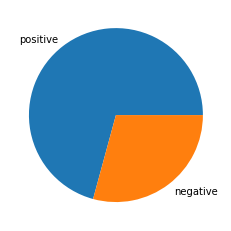

In [308]:
posi=0
nega=0
for i in range (0,len(cdata)):
    get_val=cdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(cdata)))*100
negper=(nega/(len(cdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [255]:
df=cdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [256]:
df.head()

Date  Prices    Comp  Negative  Neutral  Positive
0  2020-06-04       0       0     0.000    1.000     0.000
1  2020-06-04       0 -0.0516     0.099    0.809     0.092
2  2020-06-04       0   0.296     0.000    0.885     0.115
3  2020-06-04       0   0.296     0.000    0.927     0.073
4  2020-06-04       0  0.2263     0.000    0.872     0.128

In [258]:
# Split the dataset as train and and test datasets
train_start_index = '0'
train_end_index = '6'
test_start_index = '7'
test_end_index = '9'
train = df.ix[train_start_index : train_end_index]
test = df.ix[test_start_index:test_end_index]

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [259]:
# Making a 2D array that will store the Negative and Positive sentiment for Training dataset.
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'Negative'],df.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)


In [260]:
numpy_df_train

array([[0.   , 0.   ],
       [0.099, 0.092],
       [0.   , 0.115],
       ...,
       [0.   , 0.208],
       [0.   , 0.116],
       [0.   , 0.075]])

In [261]:
# Making a 2D array that will store the Negative and Positive sentiment for Testing dataset
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'Negative'],df.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [262]:
numpy_df_test

array([], dtype=float64)

In [263]:
# Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same
y_train = pd.DataFrame(train['Prices'])

y_test = pd.DataFrame(test['Prices'])


In [264]:
y_train.head()

Prices
0       0
1       0
2       0
3       0
4       0

In [132]:
!pip install treeinterpreter

In [265]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [266]:
# Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))
# Instantiate the RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [5]:
# Make a predition
#prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [268]:
prediction

array([[317.19]])